In [ ]:
# default_exp examples00

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#hide
!pip install nbdev
!pip install fastcore

     |████████████████████████████████| 51kB 1.7MB/s 


In [ ]:
#hide
!pip install fastai2

     |████████████████████████████████| 174kB 2.8MB/s 
     |████████████████████████████████| 734.6MB 22kB/s 
     |████████████████████████████████| 10.2MB 52.1MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0


In [ ]:
#hide
% cd /content/drive/My\ Drive/fa_convnav

/content/drive/My Drive/fa_convnav


In [ ]:
#hide
#not deps but we need them to use nbdev and run tests
from nbdev import * 
from nbdev.showdoc import *
from fastcore.test import *

# Examples00

> Examples of fa_convnav usage.

In [ ]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from torch import torch
from fa_convnav.navigator import *

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'),
                 item_tfms=Resize(460),
                 batch_tfms=[*aug_transforms(size=224, max_rotate=30, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

5912


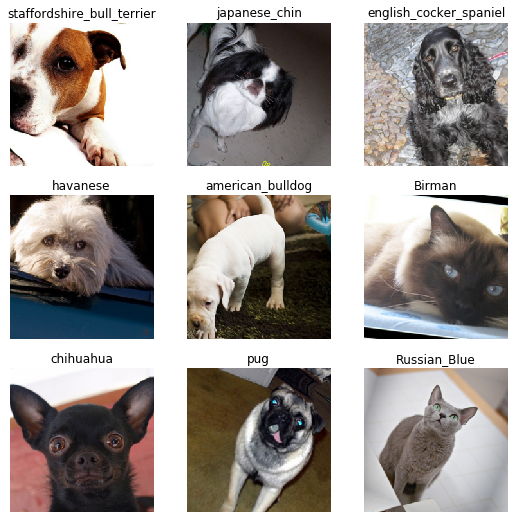

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images",  bs=128)
print(len(dls.train_ds.items))
dls.show_batch(max_n=9)

In [ ]:
model = vgg16_bn

In [ ]:
learn = cnn_learner(
    dls, 
    model, 
    opt_func=partial(Adam, lr=slice(3e-3), wd=0.01, eps=1e-8), 
    metrics=error_rate, 
    config=cnn_config(ps=0.33)).to_fp16()

In [ ]:
cn = Convnav(learn)

In [ ]:
cn.supported_models()

Supported models

vgg11_bn
vgg13_bn
vgg16_bn
vgg19_bn
alexnet
squeezenet1_0
squeezenet1_1
resnet18
resnet34
resnet50
resnet101
resnet151
densenet121
densenet161
densenet169
densenet201
xresnet101
xresnet152
xresnet18
xresnet18_deep
xresnet18_deeper
xresnet34
xresnet34_deep
xresnet34_deeper
xresnet50
xresnet50_deep
xresnet50_deeper


### Test function

In [ ]:
#export
def examples_test(test):
  "Examples function"
  print(test)

In [ ]:
examples_test('test')

test
